# Quantifying Shakespeare

In this notebook we will find the frequencies with which Shakespeare's words used letters

In [1]:
from io import TextIOWrapper

def read_file(filename: str) -> list[str]:
    """Given the name of a file, return a list of its lines."""
    lines: list[str] = []
    file: TextIOWrapper = open(filename, "r", encoding="utf8")
    for line in file:
        line = line.strip()
        line = line.lower()
        if line != "":
            lines.append(line)
    return lines

shakespeare_lines: list[str] = read_file("./shakespeare.txt")
print(len(shakespeare_lines))
print(shakespeare_lines[0:22])

114647
['1609', 'the sonnets', 'by william shakespeare', '1', 'from fairest creatures we desire increase,', "that thereby beauty's rose might never die,", 'but as the riper should by time decease,', 'his tender heir might bear his memory:', 'but thou contracted to thine own bright eyes,', "feed'st thy light's flame with self-substantial fuel,", 'making a famine where abundance lies,', 'thy self thy foe, to thy sweet self too cruel:', "thou that art now the world's fresh ornament,", 'and only herald to the gaudy spring,', 'within thine own bud buriest thy content,', "and tender churl mak'st waste in niggarding:", 'pity the world, or else this glutton be,', "to eat the world's due, by the grave and thee.", '2', 'when forty winters shall besiege thy brow,', "and dig deep trenches in thy beauty's field,", "thy youth's proud livery so gazed on now,"]


The next step of our analysis is to count the letters in the lines list one-by-one to find the frequency of use of each letter.

In [2]:
# Goal: define a function named 'tally'
# Give the function (as params) a dictionary reference (key: str, value: int) and a key
# If the key is in the dictionary, increase value by 1
# Otherwise, set key's value to one

def tally(counts: dict[str, int], key: str) -> None:
    """Mutate counts to increment a key by 1 if it exists, initialize to 1."""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1

def count_letters(lines: list[str]) -> dict[str, int]:
    """Count frequencies of all letters in a list of strings."""
    counts: dict[str, int] = {}
    # loop through all lines
    # for each line loop through all charaters
    # tally character into the counts dictionary
    # Challenge: tally through only letters
    for line in lines:
        for char in line:
            if char.isalpha():
                tally(counts, char)
    return counts

shakespeare_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakespeare_letters)

{'t': 329016, 'h': 236599, 'e': 446203, 's': 248548, 'o': 313931, 'n': 242773, 'b': 61801, 'y': 94183, 'w': 89293, 'i': 253370, 'l': 169680, 'a': 288618, 'm': 111233, 'k': 35366, 'p': 58262, 'r': 237286, 'f': 80342, 'c': 87861, 'u': 128706, 'd': 149146, 'g': 68060, 'v': 37500, 'z': 1626, 'x': 5219, 'q': 3577, 'j': 4753}


Let's create a visualization of this data with a bar chart.

In [3]:
items_in_dict: list[tuple[str, int]] = list(shakespeare_letters.items())
items_in_dict = sorted(items_in_dict)

sorted_letters: dict[str, int] = dict(items_in_dict)
print(sorted_letters)

{'a': 288618, 'b': 61801, 'c': 87861, 'd': 149146, 'e': 446203, 'f': 80342, 'g': 68060, 'h': 236599, 'i': 253370, 'j': 4753, 'k': 35366, 'l': 169680, 'm': 111233, 'n': 242773, 'o': 313931, 'p': 58262, 'q': 3577, 'r': 237286, 's': 248548, 't': 329016, 'u': 128706, 'v': 37500, 'w': 89293, 'x': 5219, 'y': 94183, 'z': 1626}


['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[288618, 61801, 87861, 149146, 446203, 80342, 68060, 236599, 253370, 4753, 35366, 169680, 111233, 242773, 313931, 58262, 3577, 237286, 248548, 329016, 128706, 37500, 89293, 5219, 94183, 1626]


<BarContainer object of 26 artists>

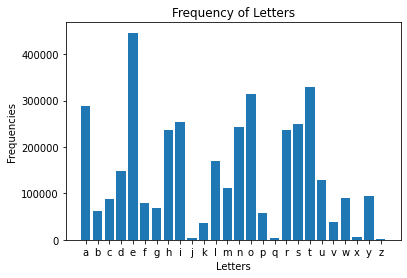

In [4]:
from matplotlib import pyplot

pyplot.title("Frequency of Letters")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequencies")
labels: list[str] = list(sorted_letters.keys())
values: list[int] = list(sorted_letters.values())
print(labels)
print(values)
pyplot.bar(labels, values)